In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
threads = [1, 2, 4, 8, 16, 32, 64, 96, 128]
simple_sparsity_pattern_exec_times = [150.709, 79.0657, 40.5101, 24.2494, 13.442, 8.22609, 5.36201,	3.84758, 3.06469]
global_sparsity_pattern_exec_times = [12.8331, 7.0986, 4.0298, 2.38081, 1.45886, 1.08403, 0.612904, 0.530549, 0.483339]
column_sparsity_pattern_exec_times = [1.61399, 0.943352, 0.594245, 0.347384, 0.217427, 0.234038, 0.105261, 0.0937473, 0.10033]
fixed_sparsity_pattern_exec_times = [1.95579, 1.19542, 0.817835, 0.58491, 0.450128, 0.471434, 0.341854, 0.328203, 0.338026]

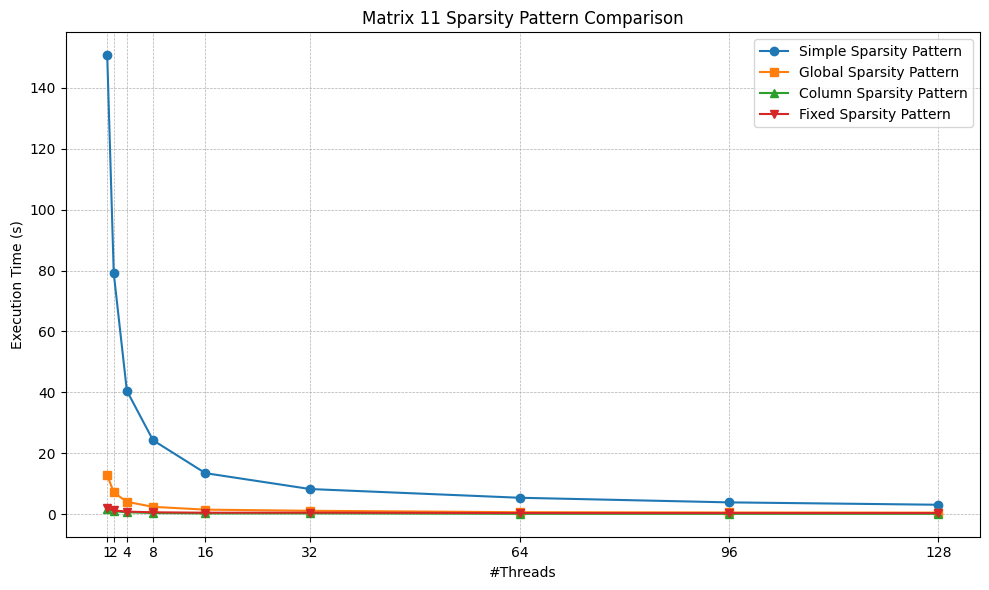

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(threads, simple_sparsity_pattern_exec_times, marker='o', label='Simple Sparsity Pattern')
plt.plot(threads, global_sparsity_pattern_exec_times, marker='s', label='Global Sparsity Pattern')
plt.plot(threads, column_sparsity_pattern_exec_times, marker='^', label='Column Sparsity Pattern')
plt.plot(threads, fixed_sparsity_pattern_exec_times, marker='v', label='Fixed Sparsity Pattern')
plt.xlabel('#Threads')
plt.ylabel('Execution Time (s)')
plt.title('Matrix 11 Sparsity Pattern Comparison')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(threads)
plt.tight_layout()
plt.show()

In [10]:
pattern_data = {
    'Simple Sparsity Pattern': simple_sparsity_pattern_exec_times,
    'Global Sparsity Pattern': global_sparsity_pattern_exec_times,
    'Column Sparsity Pattern': column_sparsity_pattern_exec_times,
    'Fixed Sparsity Pattern': fixed_sparsity_pattern_exec_times
}
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple']
markers = ['o', 's', '^', 'v']

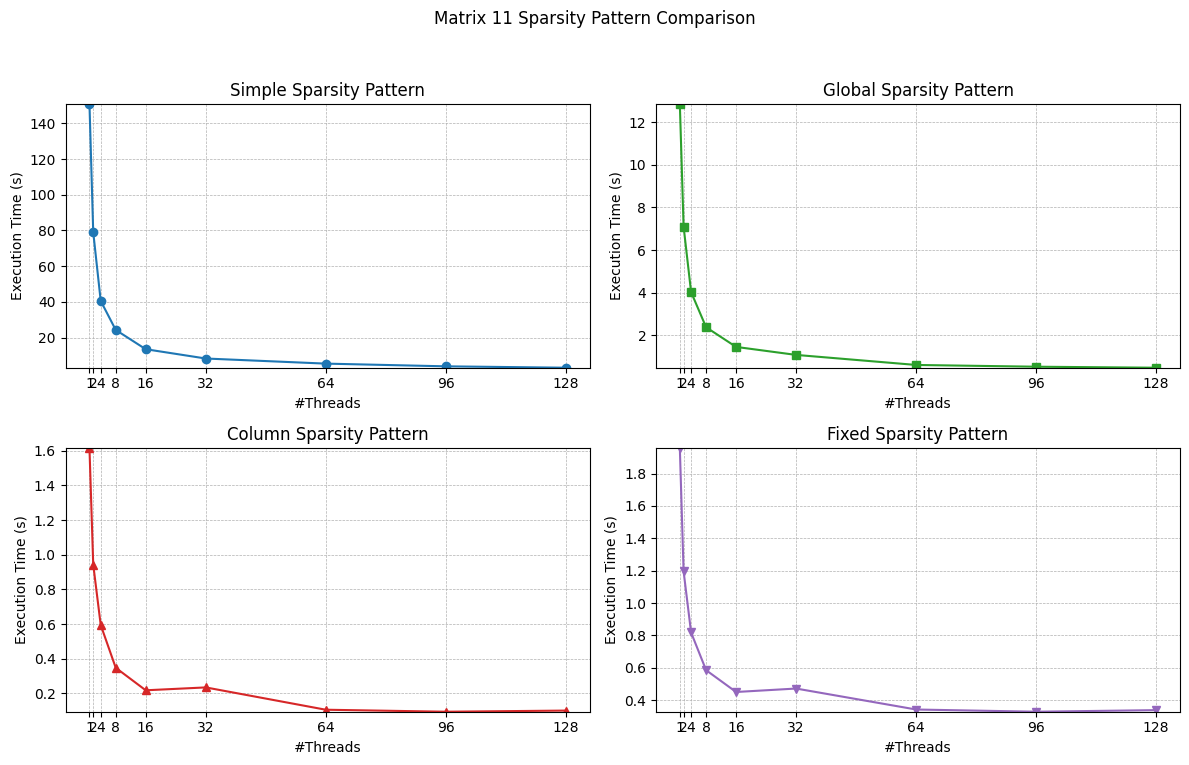

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for idx, (label, times) in enumerate(pattern_data.items()):
    ax = axs[idx]
    ax.plot(threads, times, marker=markers[idx], color=colors[idx], label=label)
    ax.set_xticks(threads)
    ax.set_xlabel('#Threads')
    ax.set_ylabel('Execution Time (s)')
    ax.set_title(label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.autoscale(enable=True, axis='y', tight=True)
    
plt.suptitle('Matrix 11 Sparsity Pattern Comparison')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
speedups = {
    label : [times[0] / t for t in times]
    for label, times in pattern_data.items()
}

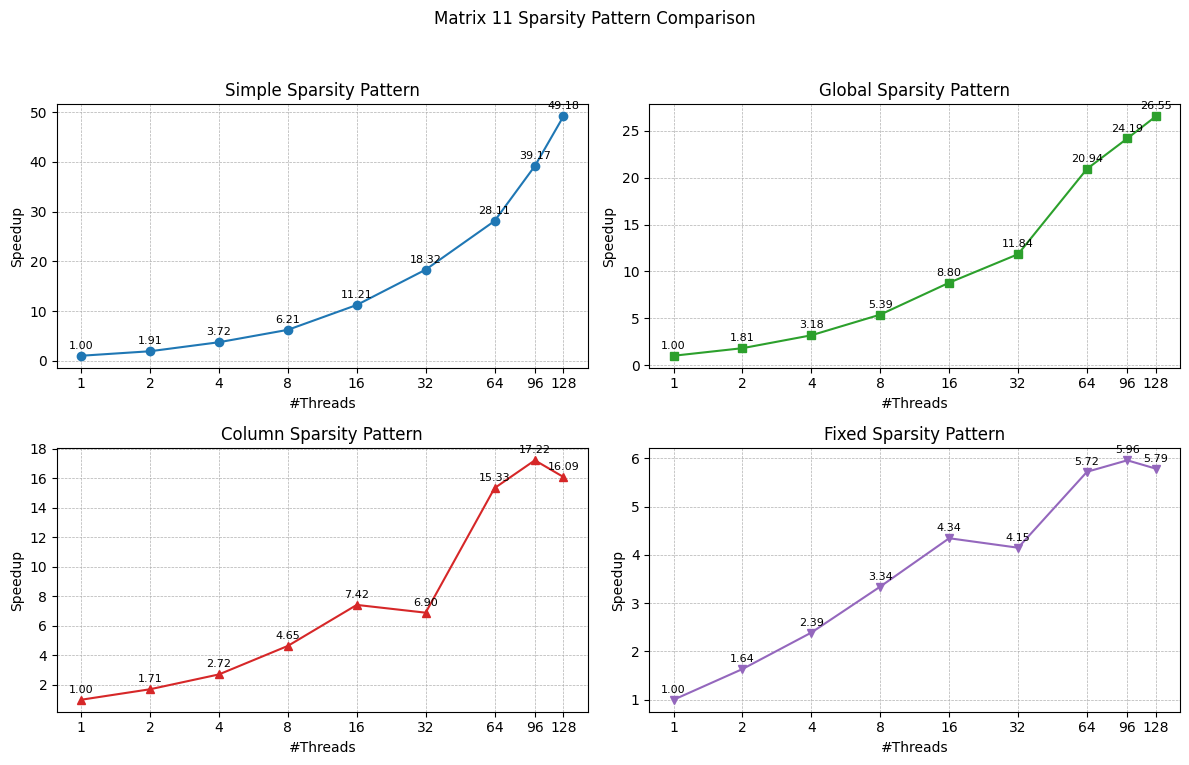

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for idx, (label, spd) in enumerate(speedups.items()):
    ax = axs[idx]
    ax.plot(threads, spd,
            marker=markers[idx], color=colors[idx], label=label)
    ax.set_xscale('log', base=2)
    ax.set_xticks(threads)
    ax.set_xticklabels(threads)
    ax.set_xlabel('#Threads')
    ax.set_ylabel('Speedup')
    ax.set_title(label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add annotations
    for x, y in zip(threads, spd):
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords="offset points",
                    xytext=(0, 5), ha='center', fontsize=8)

plt.suptitle('Matrix 11 Sparsity Pattern Comparison')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [24]:
nonzeros = np.array([8483083, 2717076, 504182, 661500])
baseline_nnz = nonzeros[0]
nnz_reduction = 100 * (baseline_nnz - nonzeros[1:]) / baseline_nnz
patterns = list(pattern_data.keys())

threads_of_interest = [1, 16, 64]
times_at_threads_of_interest = {
    t: [pattern_data[pattern][threads.index(t)] for pattern in patterns]
    for t in threads_of_interest
}

baseline_times = {
    t: times_at_threads_of_interest[t][0] for t in threads_of_interest
}

time_reductions = {
    t: 100 * (baseline_times[t] - np.array(times_at_threads_of_interest[t][1:])) / baseline_times[t]
    for t in threads_of_interest
}
pattern_labels = ['Simple', 'Global', 'Column', 'Fixed']

/tmp/ipykernel_6160/1016419804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs_0_0.set_xticklabels(pattern_labels)
/tmp/ipykernel_6160/1016419804.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs_0_1.set_xticklabels(pattern_labels[1:])


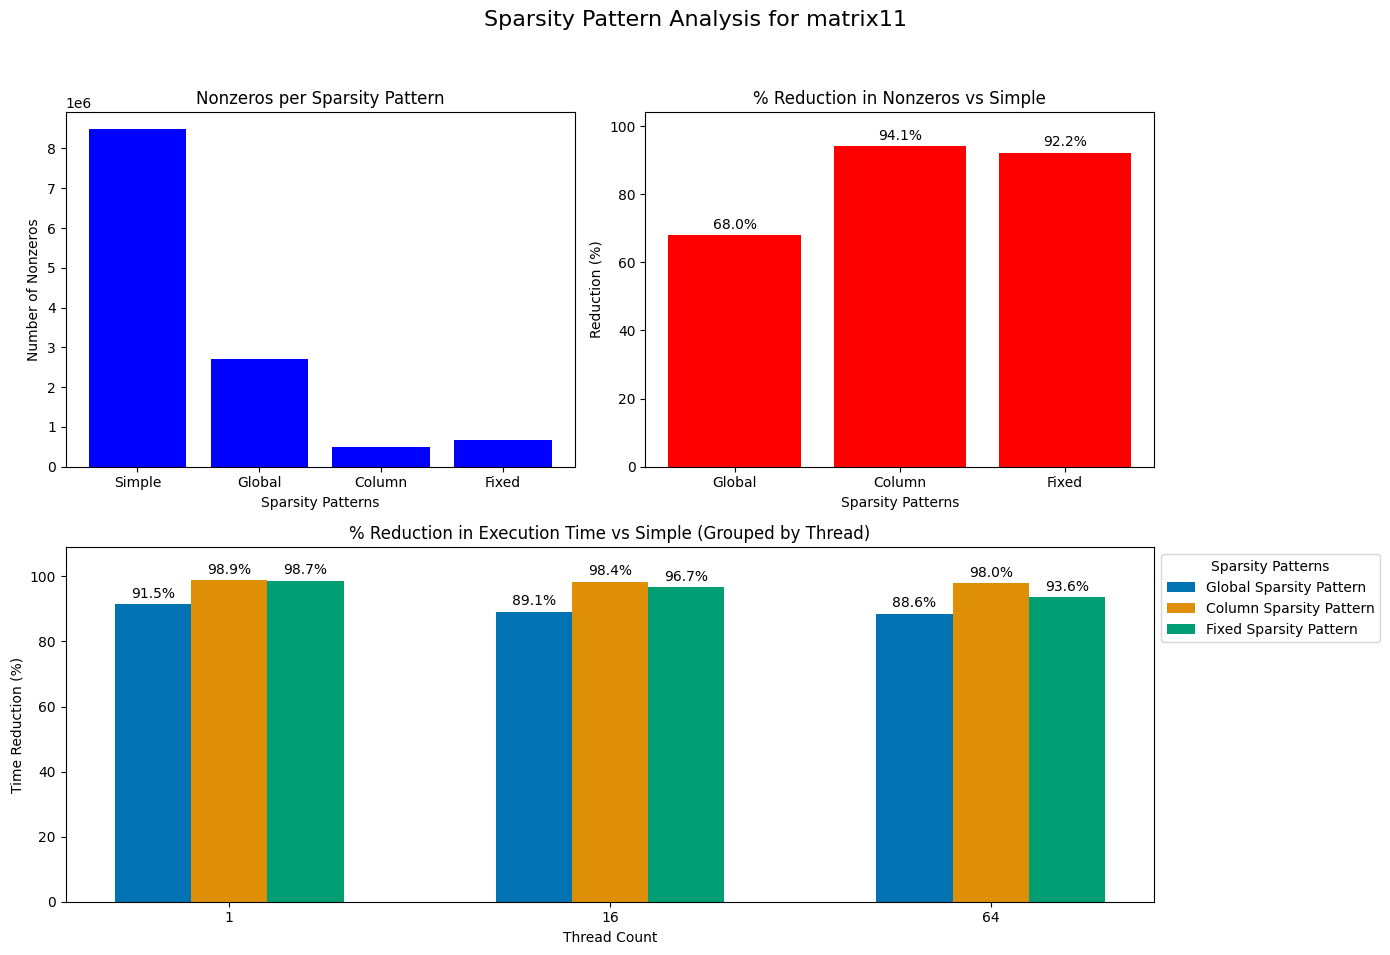

In [ ]:
# Create a custom layout using GridSpec
fig = plt.figure(figsize=(14, 10))
# 2 rows, 2 columns, second row larger
gs = fig.add_gridspec(2, 2)

# Create subplots with custom layout
axs_0_0 = fig.add_subplot(gs[0, 0])  # First subplot
axs_0_1 = fig.add_subplot(gs[0, 1])  # Second subplot
# Third subplot spanning both columns of second row
axs_1_0 = fig.add_subplot(gs[1, :])

# 1. Nonzeros bar plot
axs_0_0.bar(patterns, nonzeros, color='blue')
axs_0_0.set_title('Nonzeros per Sparsity Pattern')
axs_0_0.set_ylabel('Number of Nonzeros')
axs_0_0.set_xticklabels(pattern_labels)
axs_0_0.set_xlabel('Sparsity Patterns')

# 2. % Reduction in nonzeros
axs_0_1.bar(patterns[1:], nnz_reduction, color='red')
axs_0_1.set_title('% Reduction in Nonzeros vs Simple')
axs_0_1.set_ylabel('Reduction (%)')
axs_0_1.set_ylim(0, max(nnz_reduction) + 10)
axs_0_1.set_xticklabels(pattern_labels[1:])
axs_0_1.set_xlabel('Sparsity Patterns')

# Annotate the bars in the 2nd plot (Percentage Reduction in Nonzeros)
for i, val in enumerate(nnz_reduction):
    axs_0_1.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

# 4. % Reduction in execution time, spanning both columns in the second row
x = np.arange(len(threads_of_interest))  # Threads = [1, 16, 64]
bar_width = 0.2

# Create the 4th plot spanning both columns
for i, pattern in enumerate(patterns[1:]):  # Skip Simple for reduction
    reductions = [time_reductions[t][i] for t in threads_of_interest]
    bars = axs_1_0.bar(x + i * bar_width, reductions, width=bar_width, label=pattern, color=sns.color_palette('colorblind', 3)[i])
    
    # Annotate each bar in the 4th plot with the reduction values
    for bar in bars:
        height = bar.get_height()
        axs_1_0.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

axs_1_0.set_xticks(x + bar_width)
axs_1_0.set_xticklabels([str(t) for t in threads_of_interest])
axs_1_0.set_xlabel('Thread Count')
axs_1_0.set_ylabel('Time Reduction (%)')
axs_1_0.set_title(
    '% Reduction in Execution Time vs Simple (Grouped by Thread)')
# Move the legend outside the plot to avoid overlapping with the data
axs_1_0.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Sparsity Patterns')
axs_1_0.set_ylim(0, max([max(v) for v in time_reductions.values()]) + 10)

# Adjust layout to make sure the 4th plot spans the full space of the second row
plt.subplots_adjust(hspace=0.4)

plt.suptitle('Sparsity Pattern Analysis for matrix11', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()